In [48]:
from bs4 import BeautifulSoup
from pprint import pprint
from urllib import request
from nltk import sent_tokenize
import nltk.data
from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
import nltk
import json
import time
import sys
import re
import numpy
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math

nltk.data.path.append('D:/WS/MSc/TMP/nltk_data')

RESOURCES_PATH_LINKS = 'Resources/Corpora/EU/Links/'
RESOURCES_PATH_POSTS = 'Resources/Corpora/EU/Posts/'
RESOURCES_COMPLETE_CORPORA_FILENAME = 'complete_wow_class_posts_dict'


class WowClassesResources:

    def __init__(self):
        None

    WOW_FORUM_ROOT_URL_EU = 'http://eu.battle.net'
    WOW_FORUM_ROOT_URL_US = 'http://us.battle.net'
    WOW_FORUM_MID_URL = '/forums/en/wow/'
    URL_PAGE_ATTRIBUTE = "?page="

    WOW_CLASS_LIST_EU = [('Death Knight', "874789/"),
                      ('Demon Hunter', "19369494/"),
                      ('Druid', "874790/"),
                      ('Hunter', "874791/"),
                      ('Mage', "874792/"),
                      ('Monk', "6038099/"),
                      ('Paladin', "874793/"),
                      ('Priest', "874794/"),
                      ('Rogue', "874795/"),
                      ('Shaman', "874796/"),
                      ('Warlock', "874929/"),
                      ('Warrior', "874930/")]
    WOW_CLASS_LIST_US = [('Death Knight', "1012662/"),
                      ('Demon Hunter', "22813967/"),
                      ('Druid', "1012663/"),
                      ('Hunter', "1012664/"),
                      ('Mage', "1012760/"),
                      ('Monk', "7379141/"),
                      ('Paladin', "1012668/"),
                      ('Priest', "1012666/"),
                      ('Rogue', "1012667/"),
                      ('Shaman', "1012669/"),
                      ('Warlock', "1012670/"),
                      ('Warrior', "1012759/")]

    class GameType:
        # PVP: 2v2 3v3 5v5 cc
        # AB, AV, BET, DR, Efc, EotS, FC, FR, FRR, IoC, LH, LM, Mid, MT, SW, Stags,
        # SoTA, SSM, ST, TB, ToK, TP, TP, WG, WSG, WV, WW, arena
        PVP = 'pvp'
        # PVE: heroic, mythic, mythic+, m+, scenario, boss, mobs, time-walking
        # LFR
        # ZF, WC, VC, DM, Ulda, UBRS, Strat, Stocks, Stockade, ST, AH, SM, SH, SFK, Scholo, RFK, RFD, RFC, MC, Mara, LBRS, Gnomer, DM Warpwood, DM East, BWL, BRD, BFD, AQ40, TAQ, AQ10, RAQ,
        PVE = 'pve'
        OTHER = 'other'
        PVP_CRITERIA = ['pvp', '2v2', '3v3', '5v5', 'cc',
                        'AB', 'AV', 'BET', 'DR', 'Efc', 'EotS', 'FC', 'FR', 'FRR', 'IoC',
                        'LH', 'LM', 'Mid', 'MT', 'SW', 'Stags', 'SoTA', 'SSM', 'ST', 'TB',
                        'ToK', 'TP', 'TP', 'WG', 'WSG', 'WV', 'WW',
                        'arena', 'bg', 'rbg', 'warsong', 'flag', 'capture', 'fr', 'fc', 'ftw',
                        'duel', 'skirmish', 'lom', 'arathi', 'los', 'focus', 'nuke', 'poly',
                        'sheep', 'alterac', '2s', '3s', '5s', 'rated', 'rating', 'battleground',
                        'battle ground', 'nagrand', 'blade\'s edge', 'blades edge',
                        'tiger\'s peak', 'tigers peak', 'ashamane\'s fall', 'ashamanes fall',
                        'black rook hold', 'tol\'viron', 'tolviron', 'dalaran', 'ruins',
                        'championship', 'deepwind gorge', 'kotmogu', 'silvershard',
                        'twin peaks', 'gilneas', 'strand', 'ashran', 'gladiator', 'mmr',
                        'honor', 'prestige']
        PVE_CRITERIA = ['pve', 'heroic', 'mythic', 'mythic+', 'm+', 'scenario', 'boss', 'mobs',
                        'time-walk', 'time-walking'
                        'RFC', 'VC', 'DM', 'WC', 'SFK', 'Stocks', 'Stockade', 'BFD', 'Gnomer',
                        'SH', 'SM', 'RFK', 'Mara', 'Ulda', 'DM', 'Warpwood', 'DM', 'East', 'Scholo',
                        'RFD', 'Strat', 'ZF', 'BRD', 'ST', 'AH', 'LBRS', 'UBRS', 'AQ', 'RAQ', 'MC',
                        'BWL', 'AQ40', 'TAQ', 'Ramps', 'BF', 'SP', 'UB', 'MT', 'AC', 'AS', 'Seth',
                        'Seth', 'Halls', 'SV', 'SH', 'Shatt', 'Halls', 'SL', 'Slabs', 'OH',
                        'DH', 'DK', 'Durn', 'Mech', 'Bot', 'Arc', 'BM', 'MgT', 'Terrace', 'MrT',
                        'HoR', 'Naxx', 'OS', 'Sarth', 'Vault', 'VoA', 'Maly',
                        'EoE', 'Uld', 'TC', 'ToC', 'TotC', 'ToGC', '(Heroic)', 'Ony',
                        'RS', 'Hal', 'ICC', 'UK', 'UTK', 'Nexus', 'Nex', 'AZN', 'AN', 'ANK',
                        'OLD', 'AKO', 'OK', 'DTK', 'VH', 'GD', 'HOS', 'Occ', 'HOL', 'UP', 'Culling',
                        'COS', 'Champ', 'ToC', 'FoS', 'PoS', 'TotT', 'BRC', 'SC', 'VP', 'LCoT', 'GB',
                        'HoO', 'H-DM', 'H-VC', 'H-SFK', 'ZA', 'ZG', 'ET', 'WoE', 'HoT', 'BH',
                        'BoT', 'TFW', 'BWD', 'FL', 'DS', 'SH', 'Scholo', 'TJS', 'SB', 'MP',
                        'SPM', 'GSS', 'SNT', 'MV', 'HoF', 'TES', 'ToT', 'SoO', 'BSM', 'Auch', 'SR',
                        'GD', 'SBG', 'EB', 'UBRS', 'HM', 'BF', 'BRF', 'HC', 'HFC', 'arc', 'VoW', 'MoS',
                        'CoS', 'EN', 'BRH', 'RtK', 'arc', 'ToV', 'VH', 'CoN', 'EoZ', 'NL', 'HoV', 'GR',
                        'DHT', 'DT']


def save_to_json_file(path, file_name, content, mode):
    with open(path + file_name + '.json', mode) as out_file:
        json.dump(content, out_file)


def read_from_json_file(path, file_name):
    try:
        with open(path + file_name + '.json', 'r') as in_file:
            return json.load(in_file)
    except FileNotFoundError as e:
        print('File not found, skipping read for: ' + path + file_name)

In [86]:
from os import listdir
from os.path import isfile, join
import re

SCORE_AUTH_FN = 'scores_auth_'
SCORE_GT_FN = 'scores_gt_'
ALGORITHM = 'Vader'

my_path = 'Resources/Corpora/EU/Scores/'
score_auth_files = [f for f in listdir(my_path) if isfile(join(my_path, f))
                    and re.search(SCORE_AUTH_FN + ALGORITHM, f)]
LATEST_SCORE_AUTH_FN = score_auth_files[-1]
pprint(LATEST_SCORE_AUTH_FN)

score_gt_files = [f for f in listdir(my_path) if isfile(join(my_path, f))
                  and re.search(SCORE_GT_FN + ALGORITHM, f)]
LATEST_SCORE_GT_FN = score_gt_files[-1]
pprint(LATEST_SCORE_GT_FN)
 
scores_auth_meta = read_from_json_file(my_path, LATEST_SCORE_AUTH_FN.replace('.json', ''))
scores_gt_meta = read_from_json_file(my_path, LATEST_SCORE_GT_FN.replace('.json', ''))
scores_gt = scores_gt_meta['score']
scores_auth = scores_auth_meta['score']
pprint(scores_auth['Death Knight']['pve'][:10])
pprint(scores_gt)

'scores_auth_Vader_2017-01-20_13-39-22.json'
'scores_gt_Vader_2017-01-20_13-39-22.json'
[['Recinius', 0.6239],
 ['Magharlogosh', 0.7118],
 ['Velnira', 0.6139666666666667],
 ['Starftlord', 0.7219000000000001],
 ['Kuroyaksha', 0.6705],
 ['Rapidor', 0.5661],
 ['Airell', 0.76815],
 ['Abacinate', 0.858],
 ['Lothyhar', 0.9274],
 ['Kronuk', -0.5104]]
{'Death Knight': {'other': [0.30155338507877666, 1079],
                  'pve': [0.22939665845351648, 1101],
                  'pvp': [0.1940320214521452, 303]},
 'Demon Hunter': {'other': [0.20035210653753024, 413],
                  'pve': [0.22678166154309826, 395],
                  'pvp': [0.06320109649122807, 114]}}


In [122]:
import matplotlib.pyplot as plt
import numpy as np


def bar_plot_gt_score(class_name, score_dict):
    data = [(key, value) for key, value in score_dict.items()]
    print(data)
    plt.rcdefaults()

    fig, ax = plt.subplots()

    # Example data
    gt = [gt_e + ' (based on \n' + str(sc_e[1]) + ' authors)' for (gt_e, sc_e) in data]
    y_pos = np.arange(len(gt))
    score = [sc_e[0] for (gt_e, sc_e) in data]
    # error = np.random.rand(len(gt))

    rect = ax.barh(y_pos, score, align='center',
            color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(gt)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Score')
    ax.set_title('Sentiment overview of ' + class_name)

    # autolabel(rect, ax)

    # plt.savefig(my_path + class_name + '.png')
    plt.show()


def autolabel(rects, ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        width = rect.get_width()
        print(width)
        ax.text(0.95*width, rect.get_y() + rect.get_height()/2.,
                '%d' % int(width),
                ha='center', va='bottom')

[('pvp', [0.06320109649122807, 114]), ('pve', [0.22678166154309826, 395]), ('other', [0.20035210653753024, 413])]


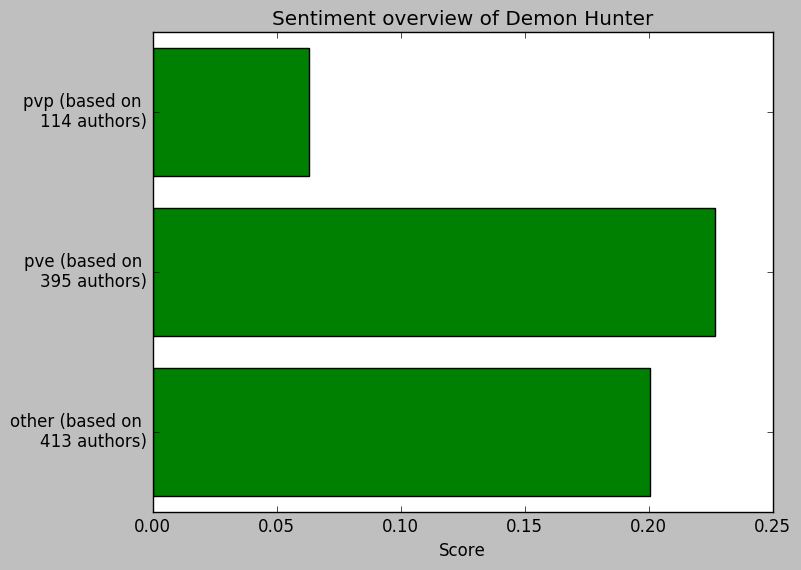

[('pvp', [0.1940320214521452, 303]), ('pve', [0.22939665845351648, 1101]), ('other', [0.30155338507877666, 1079])]


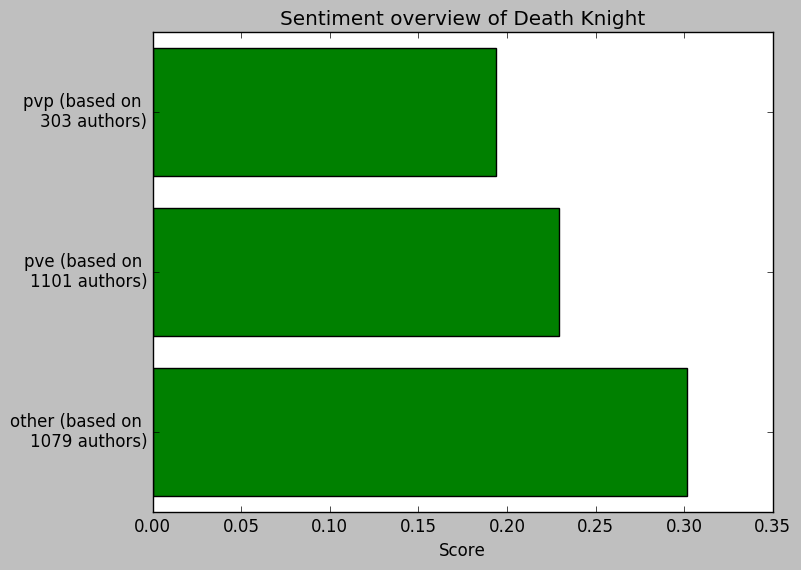

In [123]:
for wow_class, score_dict in scores_gt.items():
    bar_plot_gt_score(wow_class, score_dict)

3405


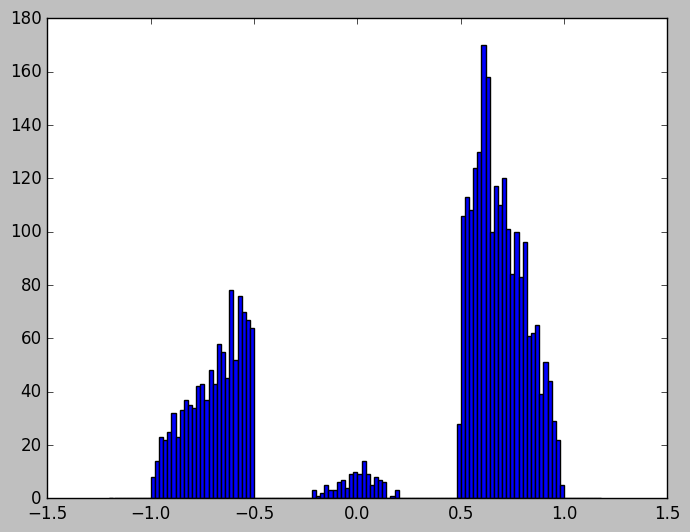

In [121]:
# scores_auth

all_scores = []
for wow_class in scores_auth:
    for gt in scores_auth[wow_class]:
        all_scores.extend([float('%.2f' % e[1]) for e in scores_auth[wow_class][gt]])
        
print(str(len(all_scores)))
# print(all_scores)

plt.hist(all_scores, bins=np.arange(-1.2, 1.2, 0.02))
plt.show()

In [175]:
pwp_onto = read_from_json_file('Resources/Ontology/', 'PWPJson2')
pprint(pwp_onto[0].keys())

dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])


In [193]:
# pprint(pwp_onto)
for e in pwp_onto:
    pprint(e.keys())
    pprint(e['@id'])
    pprint(e['@type'][0])
    if 'subClassOf' in [k for k, v in e.items()]:
        pprint('subClass of: ' + e['subClassOf'][0]['@id'])
    if 'hasLexicalization' in [k for k, v in e.items()]:
        pprint([lexi['@value'] for lexi in e['hasLexicalization']])
    print('\n')

dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Affliction'
'Class'
'subClass of: Warlock'
['Affli']


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
"Ahn'kahet:_The_Old_Kingdom"
'Class'
'subClass of: Dungeon'
['AKO', 'ANK', 'OK', 'OLD']


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Alterac_Valley'
'Class'
'subClass of: Battleground'
['AV']


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Arathi_Basin'
'Class'
'subClass of: Battleground'
['AB']


dict_keys(['@id', 'subClassOf', '@type'])
'Arcane'
'Class'
'subClass of: Mage'


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Arcatraz'
'Class'
'subClass of: Dungeon'
['Arc']


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Arena'
'Class'
'subClass of: Instance'
['2s', '2v2', '3s', '3v3', '5s', '5v5', 'rated', 'skirmish']


dict_keys(['@id', 'hasLexicalization', 'subClassOf', '@type'])
'Arms'
'Class'
'subClass of: Warrior'
['Arm']


dict_ke

In [307]:
class WowOntoElement:

    def __init__(self, name, parent, children_list, lex_list):
        self.name = name
        self.parent = parent
        self.children_list = children_list
        self.lex_list = lex_list

    def __str__(self):
        parent_name = 'NONE'
        if self.parent is not None:
            parent_name = self.parent.name
        return self.name + ' (' + parent_name + ') \nchildren: ' \
               + str([t.name for t in self.children_list]) + '\nlex: ' \
               + str(self.lex_list)

    def get_top_parent(self):
        if self.parent is None:
            return self
        else:
            return self.parent.get_top_parent()

    def get_sub_parent(self):
        if self.parent is None:
            return None
        elif self.parent.parent is None:
            return self
        else:
            return self.parent.get_sub_parent()


def build_onto_recursive(parent):
    result = []
    if parent is None:
        for e in pwp_onto:
            if 'subClassOf' not in [k for k, v in e.items()]:
                ch_list = []
                lex_list = []
                elem = WowOntoElement(e['@id'], None, ch_list, lex_list)
                result.append(elem)
                if 'hasLexicalization' in [k for k, v in e.items()]:
                    elem.lex_list.extend([lexi['@value'] for lexi in e['hasLexicalization']])
                elem.children_list = build_onto_recursive(elem)
                print(elem.name)
                print(elem.children_list)
                print(elem.lex_list)

                print(str(elem))
    else:
        print('parent = ' + parent.name)
        for e in pwp_onto:
            if 'subClassOf' in [k for k, v in e.items()] \
                    and e['subClassOf'][0]['@id'] == parent.name:
                ch_list = []
                lex_list = []
                elem = WowOntoElement(e['@id'], parent, ch_list, lex_list)
                result.append(elem)
                if 'hasLexicalization' in [k for k, v in e.items()]:
                    elem.lex_list.extend([lexi['@value'] for lexi in e['hasLexicalization']])
                elem.children_list = build_onto_recursive(elem)
                if elem.lex_list is None:
                    print(elem.name + '********** LEXI LIST IS NONE')
                if elem.children_list is None:
                    print(elem.name + '********** CHILDREN LIST IS NONE')
                print(str(elem))
    return result

In [308]:
# pprint(pwp_onto)

# [str(t) for t in build_onto_recursive(None)]
pwp_onto_struct = build_onto_recursive(None)
print('*************')
# for e in pwp_onto:
#     pprint(e.keys())
#     pprint(e['@id'])
#     pprint(e['@type'][0])
#     elem = WowOntoElement(e['@id'], None, None, None)
#     if 'subClassOf' in [k for k, v in e.items()]:
#         pprint('subClass of: ' + e['subClassOf'][0]['@id'])
#         elem.parent
#     if 'hasLexicalization' in [k for k, v in e.items()]:
#         pprint([lexi['@value'] for lexi in e['hasLexicalization']])
#     print(elem)
#     print('\n')

parent = Instance
parent = Arena
parent = Ashamane's_Fall
Ashamane's_Fall (Arena) 
children: []
lex: ['Ashamanes Fall']
parent = Black_Rook_Hold_Arena
Black_Rook_Hold_Arena (Arena) 
children: []
lex: ['BRH Arena', 'Black Rook']
parent = Blade's_Edge_Arena
Blade's_Edge_Arena (Arena) 
children: []
lex: ['Blades Edge']
parent = Dalaran_Arena
Dalaran_Arena (Arena) 
children: []
lex: ['Sewers']
parent = Nagrand_Arena
Nagrand_Arena (Arena) 
children: []
lex: ['Nagrand']
parent = Ruins_of_Lordaeron
Ruins_of_Lordaeron (Arena) 
children: []
lex: ['Ruins', 'Undercity', 'Undercity Arena']
parent = The_Ring_of_Valor
The_Ring_of_Valor (Arena) 
children: []
lex: ['Orgrimmar Arena']
parent = The_Tiger's_Peak
The_Tiger's_Peak (Arena) 
children: []
lex: ['Tigers Peak']
parent = Tol'viron_Arena
Tol'viron_Arena (Arena) 
children: []
lex: ['Tolviron']
Arena (Instance) 
children: ["Ashamane's_Fall", 'Black_Rook_Hold_Arena', "Blade's_Edge_Arena", 'Dalaran_Arena', 'Nagrand_Arena', 'Ruins_of_Lordaeron', 'The_

In [312]:
# pprint([str(t) for t in pwp_onto_struct])

print(str(pwp_onto_struct[0].children_list[1].children_list[1]))
print(str(pwp_onto_struct[0].children_list[1].children_list[1].get_top_parent()))
print(str(pwp_onto_struct[0].children_list[1].children_list[1].get_sub_parent()))
print(str(pwp_onto_struct[0].get_sub_parent()))

Arathi_Basin (Battleground) 
children: []
lex: ['AB']
Instance (NONE) 
children: ['Arena', 'Battleground', 'Dungeon', 'Raid']
lex: []
Battleground (Instance) 
children: ['Alterac_Valley', 'Arathi_Basin', 'Deepwind_Gorge', 'Eye_of_the_Storm', 'Isle_of_Conquest', 'Silvershard_Mines', 'Southshore_vs._Tarren_Mill', 'Strand_of_the_Ancients', 'Tarren_Mill_vs_Southshore', 'Temple_of_Kotmogu', 'The_Battle_for_Gilneas', 'Twin_Peaks', 'Warsong_Gulch']
lex: ['bg', 'ranked', 'rbg']
None
